In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import importlib
from modules import base_model as bm 
importlib.reload(bm)

print(f'Imported modules successfully!')


Imported modules successfully!


### Bird Flocking - Toy Model
Uses the code from `modules/base_model.py`. This is the same as Flossie's 'theta' version, but with the following changes:

Changes made to code when copying across to `base_model.py`:
1. Arguments `vx, vy` were often just used for their size. Removed because we can always just use `x` (or `y`) to find the total number `N`.
2. Added the radius argument `R` to some functions that needed it but did not have it in their parameters yet.
3. **Bug?** In `match_birds` the velocity updates `sx_mean` and `sy_mean` were being completely overwritten for each bird. Before:
    - `sx_mean = np.linalg.norm(vx[neighbours])`<br>
    so have changed to be `sx_mean[bird] = ...`.
4. Combined `update_theta` and `get_mean_theta`.
5. Updated `lim_s()` so that it updates each boid individually. Before I think it was also globally updated the maximum speeds.

The simulation parameters are slightly different to those used for the presentation. Have messed around with quite a few different versions - at one point want to document these more formally. The system dynamics are very sensitive!

#### Fixing a seed.
The simulation looks very different for different sets of initial conditions.
Can control the initial conditions with `np.random.seed()`. For example, the seed `2` gives interesting behaviour where flocks form but do crash into each other.

--------------------------------------------------------------------------------------------------------------------------
Can we consider fixing initial conditions ourselves rather than relying on a seed.
See code added to initilize_birds (commented out).
We could give a range, while still applying an element of randomness, so that birds are initially grouped in an area.
This may not be necessary, but it gives us more flexability with obstacles if we want to keep them from obstacles.
We can also apply the same logic to initial velocities to guarantee they are initially travelling towards the obstacles.
The effects of eta may need to be altered if this is the case.
- Colm


In [3]:
np.random.seed(2)

In [4]:
v0           = 0.5  # Velocity
eta          = 0.6  # Random fluctuation in angle (in radians)
L            = 10    # Size of box
R            = 1      # Interaction radius
dt           = 0.2    # Time step
Nt           = 500    # Number of time steps
N            = 100   # Number of birds

A = 0.15 # Avoidance radius 

lam_c = 0.2 # Centre of mass weight 
lam_a = 0.80 # Avoid collisions weight
lam_m = 0.4 # Match velocities weight 

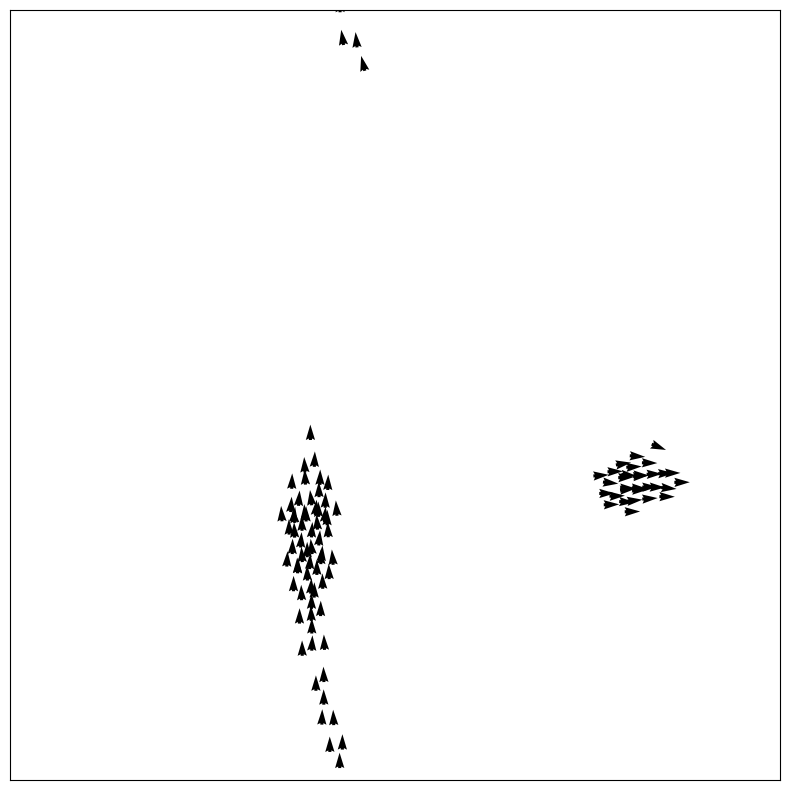

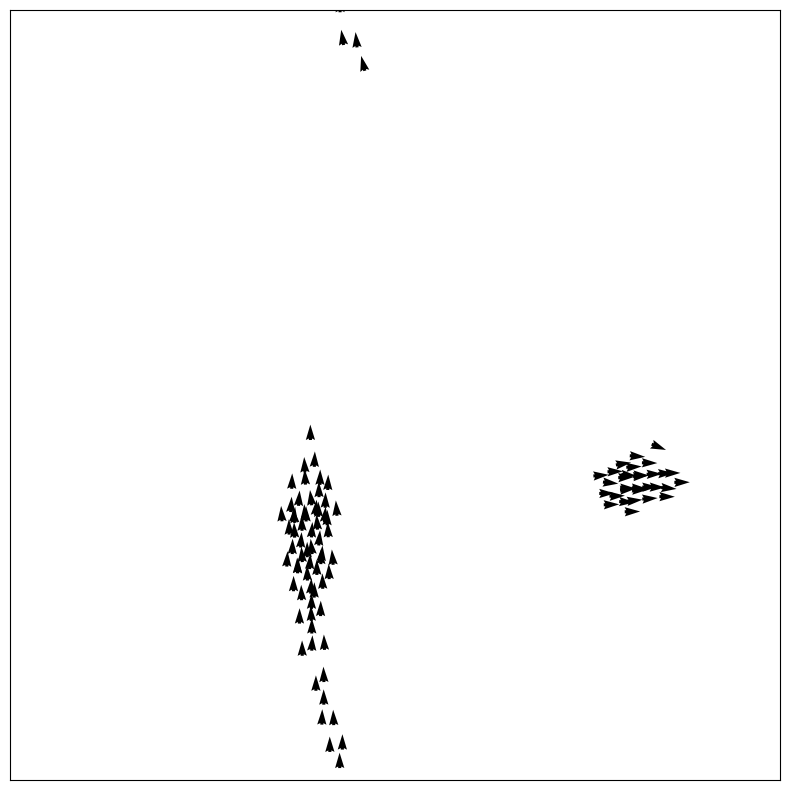

In [6]:
# Update quiver - the 'arrows' for matplotlib.
def update_quiver(q, x, y, vx, vy):
    # Updates the arrows on the plot.
    q.set_offsets(np.column_stack([x,y]))
    q.set_UVC(vx,vy)
    
    return q

# Set up a figure.
fig, ax = plt.subplots(figsize = (10,10))

# Get the initial configuration
x, y, vx, vy, theta = bm.initialize_birds(N, L, v0)

# Save the initial values to be used later
x_init, y_init, vx_init, vy_init, theta_init = (
    x.copy(), y.copy(), vx.copy(), vy.copy(), theta.copy()
)

# Do an initial plot and set up the axes.
q = plt.quiver(x, y, vx, vy, scale = 50)
ax.set(xlim = (0, L), ylim = (0, L))
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the first frame.
# fig.savefig("frame_0.png", dpi=300)

# Do each step, updating the quiver and plotting the new system.
for iT in range(Nt):
    x, y, vx, vy, theta = bm.step(x, y, vx, vy, theta, dt, L, A, lam_c, lam_a, lam_m, eta, v0)
    q = update_quiver(q, x, y, vx, vy)
    clear_output(wait = True)
    display(fig)

# Save the final frame.
# fig.savefig("frame_final.png", dpi=300)


### Parameter Arrays
Each simulation relies on two main sets of parameters - the strength/radius parameters $\lambda_c, \lambda_a, \lambda_m, A, R$, and the initial condition/grid parameters, `v0, eta, L, dt, Nt, N`. Most of the time we are adjusting the former, so it makes sense to split them up.

`strength_params = [lam_c, lam_a, lam_m, A, R]`.<br>
`model_params = [v0, eta, L, dt, Nt, N]`.

**We could look at making this into a dictionary for readability.**

We want to run the simulation lots of times, so it also makes sense to make a helper function to do so.

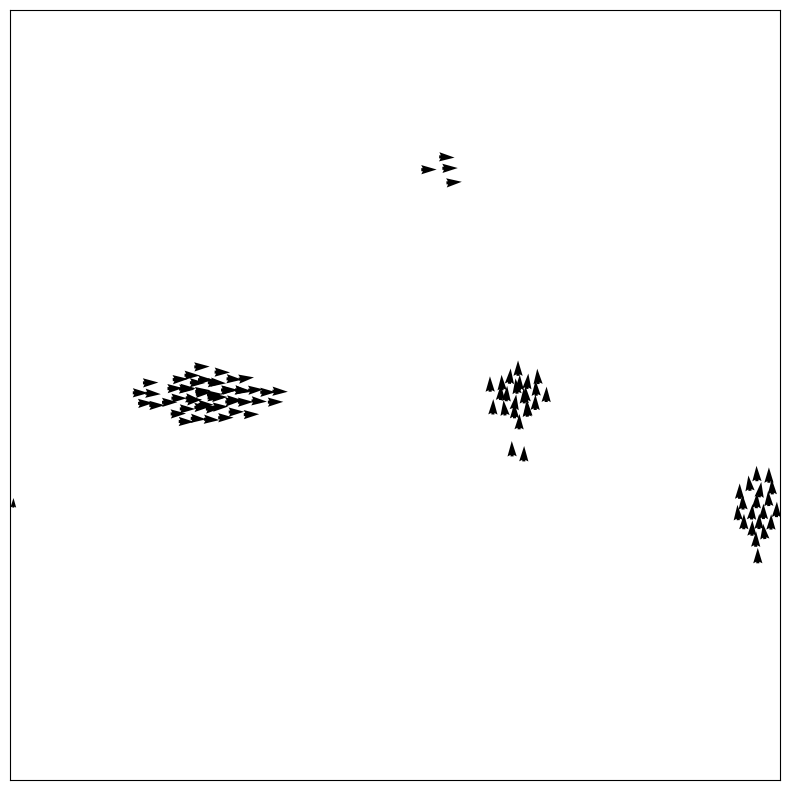

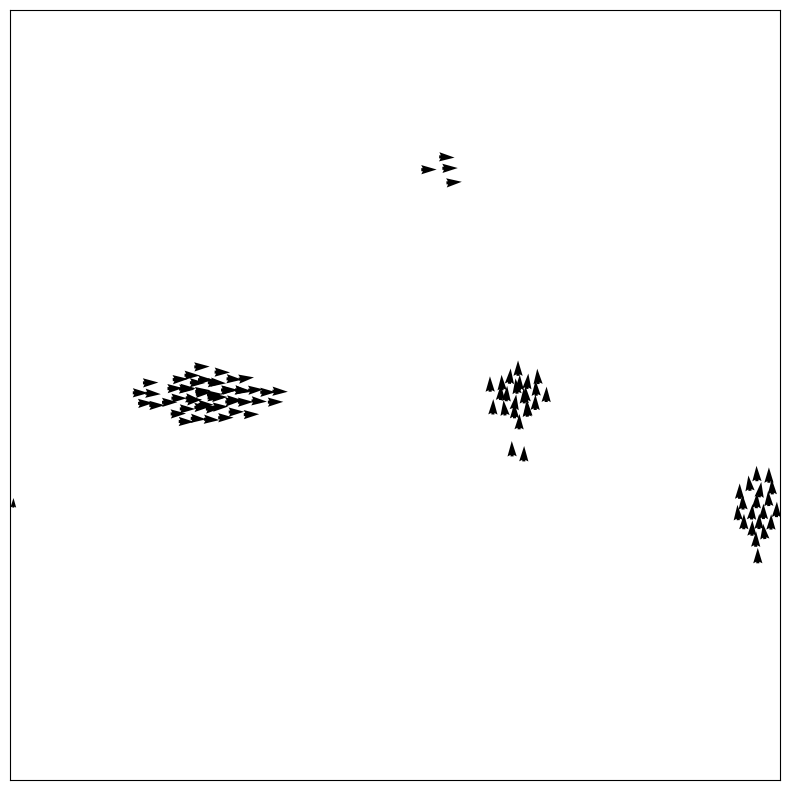

In [7]:
from modules import run_simulation
importlib.reload(run_simulation)

# v0, eta, L, dt, Nt, N.
model_params = [0.5, 0.6, 10, 0.2, 500, 100]

# lam_c, lam_a, lam_m, A, R.
strength_params = [0.2, 0.8, 0.4, 0.15, 1.25]

run_simulation.plot_simulation(model_params, strength_params)


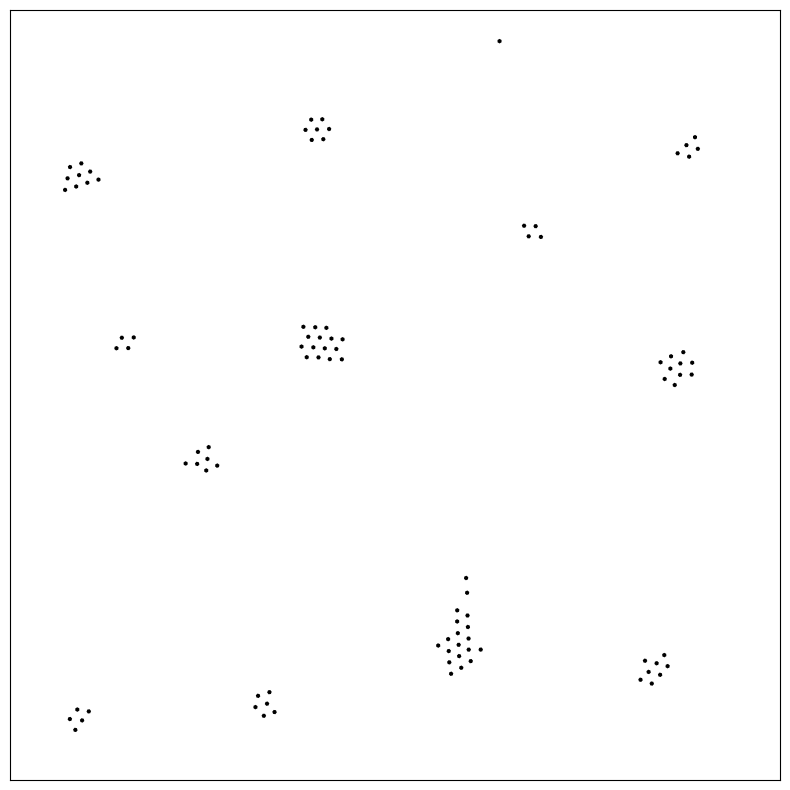

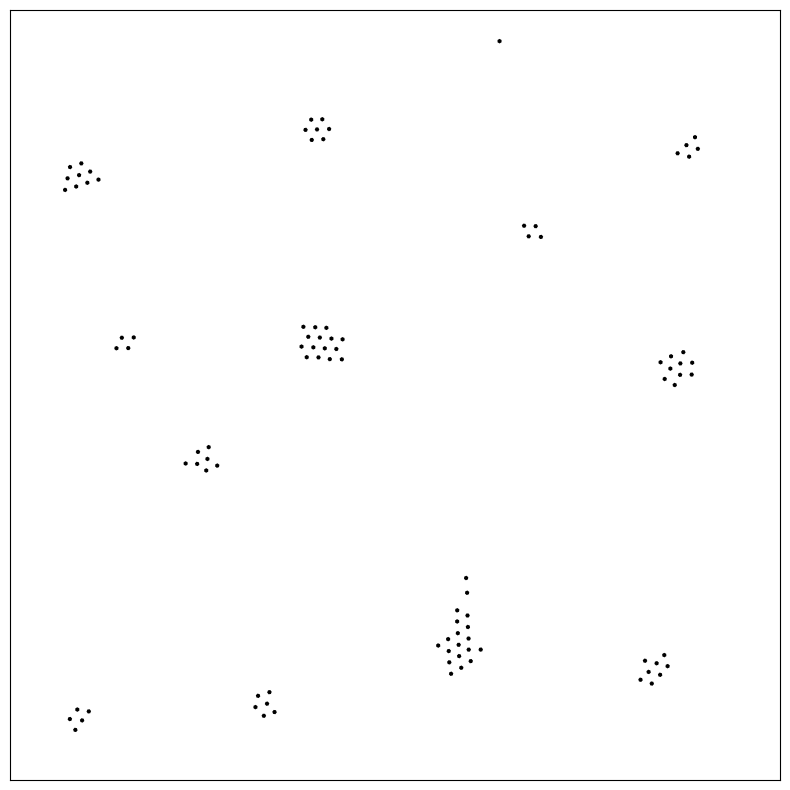

In [8]:
# We can change the parameters and run the simulation again very easily.
# e.g. let's make the birds really, really, REALLY, slow.

model_params = [0.01, 0.6, 10, 0.2, 500, 100]
run_simulation.plot_simulation(model_params, strength_params)
